In [1]:
# Import the libraries
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
%matplotlib inline

In [2]:
def isnumber(x):
    try:
        int(x)
        return True
    except:
        return False

In [3]:
raft_data_3_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\experiments\\packet_loss\\raft_outdoor\\raft_3-nodes_1-fail\\data.csv", sep=",")

In [4]:
raft_data_3_nodes[raft_data_3_nodes.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp
0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,19,150,52,20
2,1,2,19,151,52,20
3,2,1,21,194,51,20
4,1,3,20,168,52,20
...,...,...,...,...,...,...
2473,3,998,21,135,53,23
2474,2,999,22,180,45,24
2475,3,999,21,154,53,23
2476,2,1000,21,181,45,24


In [5]:
paxos_data_3_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\experiments\\packet_loss\\paxos_outdoor\\paxos_3-nodes_1-fail\\data.csv", sep=",")

In [6]:
noalg_data_3_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\experiments\\packet_loss\\control_outdoor\\outdoor_control_3-nodes_1-fail\\data.csv", error_bad_lines=False, sep=",")

b'Skipping line 1583: expected 6 fields, saw 7\nSkipping line 1613: expected 6 fields, saw 7\n'


In [7]:
raft_data_3_nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   nodeName      2478 non-null   object
 1   packetNumber  2474 non-null   object
 2   temperature   2473 non-null   object
 3   brightness    2473 non-null   object
 4   humidity      2470 non-null   object
 5   onBoardTemp   2467 non-null   object
dtypes: object(6)
memory usage: 116.3+ KB


In [8]:
raft_data_3_nodes.shape

(2478, 6)

In [9]:
paxos_data_3_nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2251 entries, 0 to 2250
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nodeName      2251 non-null   object 
 1   packetNumber  2247 non-null   object 
 2   temperature   2247 non-null   float64
 3   brightness    2247 non-null   object 
 4   humidity      2247 non-null   object 
 5   onBoardTemp   2244 non-null   object 
dtypes: float64(1), object(5)
memory usage: 105.6+ KB


In [10]:
paxos_data_3_nodes.shape

(2251, 6)

In [11]:
noalg_data_3_nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2012 entries, 0 to 2011
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   nodeName      2012 non-null   object
 1   packetNumber  1999 non-null   object
 2   temperature   1995 non-null   object
 3   brightness    1984 non-null   object
 4   humidity      1975 non-null   object
 5   onBoardTemp   1967 non-null   object
dtypes: object(6)
memory usage: 94.4+ KB


In [12]:
noalg_data_3_nodes.shape

(2012, 6)

In [13]:
#RAFT

In [14]:
raft_data_3_nodes[raft_data_3_nodes.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp
0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,19,150,52,20
2,1,2,19,151,52,20
3,2,1,21,194,51,20
4,1,3,20,168,52,20
...,...,...,...,...,...,...
2473,3,998,21,135,53,23
2474,2,999,22,180,45,24
2475,3,999,21,154,53,23
2476,2,1000,21,181,45,24


In [15]:
raft_data_3_nodes_clean = raft_data_3_nodes.dropna()

In [16]:
raft_data_3_nodes_clean.shape

(2467, 6)

In [17]:
raft_data_3_nodes_clean.to_csv('C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\raft_data_3_nodes_1_clean.csv', index = False, header=True)

In [18]:
#manual cleaning of the csv req

In [19]:
clean_raft_data_3_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\raft_data_3_nodes_1_clean.csv", sep=",")

In [20]:
clean_raft_data_3 = clean_raft_data_3_nodes.dropna()

In [21]:
final_clean_raft_3 = clean_raft_data_3.astype({"nodeName":np.int64,"packetNumber":np.int64,"temperature":np.int64,"brightness":np.int64,"humidity":np.int64,"onBoardTemp":np.int64})

In [22]:
final_clean_raft_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2464 entries, 0 to 2466
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   nodeName      2464 non-null   int64
 1   packetNumber  2464 non-null   int64
 2   temperature   2464 non-null   int64
 3   brightness    2464 non-null   int64
 4   humidity      2464 non-null   int64
 5   onBoardTemp   2464 non-null   int64
dtypes: int64(6)
memory usage: 134.8 KB


In [23]:
#PAXOS

In [24]:
paxos_data_3_nodes[paxos_data_3_nodes.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp
0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,19.0,131,53,19
2,1,2,19.0,131,53,19
3,1,3,20.0,114,53,19
4,1,4,20.0,114,53,19
...,...,...,...,...,...,...
2246,2,998,21.0,162,42,23
2247,3,999,20.0,152,50,22
2248,2,999,20.0,154,42,23
2249,3,1000,20.0,150,50,22


In [25]:
paxos_data_3_nodes_clean = paxos_data_3_nodes.dropna()

In [26]:
paxos_data_3_nodes_clean.shape

(2244, 6)

In [27]:
paxos_data_3_nodes_clean.to_csv('C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\paxos_data_3_nodes_1_clean.csv', index = False, header=True)

In [28]:
#manual cleaning of the csv req

In [28]:
clean_paxos_data_3_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\paxos_data_3_nodes_1_clean.csv", sep=",")

In [29]:
clean_paxos_data_3_nodes.shape

(2244, 6)

In [30]:
clean_paxos_data_3 = clean_paxos_data_3_nodes.dropna()

In [31]:
clean_paxos_data_3.shape

(2242, 6)

In [32]:
final_clean_paxos_3 = clean_paxos_data_3.astype({"nodeName":np.int64,"packetNumber":np.int64,"temperature":np.int64,"brightness":np.int64,"humidity":np.int64,"onBoardTemp":np.int64})

In [33]:
#NO ALG

In [34]:
noalg_data_3_nodes[noalg_data_3_nodes.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp
0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,24,65535,37,24
2,5,2,23,65535,37,24
3,NaN,NaN,NaN,NaN,NaN,NaN
4,5,3,23,65535,37,24
...,...,...,...,...,...,...
2007,5,996,19,65535,42,20
2008,5,997,20,65535,42,20
2009,5,998,19,65535,42,20
2010,5,999,20,65535,42,20


In [35]:
noalg_data_3_nodes_clean = noalg_data_3_nodes.dropna()

In [36]:
noalg_data_3_nodes_clean.shape

(1966, 6)

In [37]:
noalg_data_3_nodes_clean.to_csv('C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\noalg_data_3_nodes_1_clean.csv', index = False, header=True)

In [39]:
#manual cleaning of the csv req

In [44]:
clean_noalg_data_3_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\noalg_data_3_nodes_1_clean.csv", sep=",")

In [45]:
clean_noalg_data_3_nodes.shape

(1966, 6)

In [46]:
clean_noalg_data_3 = clean_noalg_data_3_nodes.dropna()

In [47]:
clean_noalg_data_3.shape

(1954, 6)

In [48]:
final_clean_noalg_3 = clean_noalg_data_3.astype({"nodeName":np.int64,"packetNumber":np.int64,"temperature":np.int64,"brightness":np.int64,"humidity":np.int64,"onBoardTemp":np.int64})

In [76]:
df = {'algorithm': ['RAFT', 'Paxos', 'NoAlgorithm'], 
               'goodPacketsReceived': [len(final_clean_raft_3), len(final_clean_paxos_3), len(final_clean_noalg_3)], 
               'totalPacketsReceived': [len(raft_data_3_nodes), len(paxos_data_3_nodes), len(noalg_data_3_nodes)], 
               'packetsExpected': [2500, 2500, 2500]}

all_3_nodes = pd.DataFrame(df)

In [77]:
plt.rcParams['figure.figsize'] = (15.0, 12.0)
plt.rcParams['font.family'] = "serif"

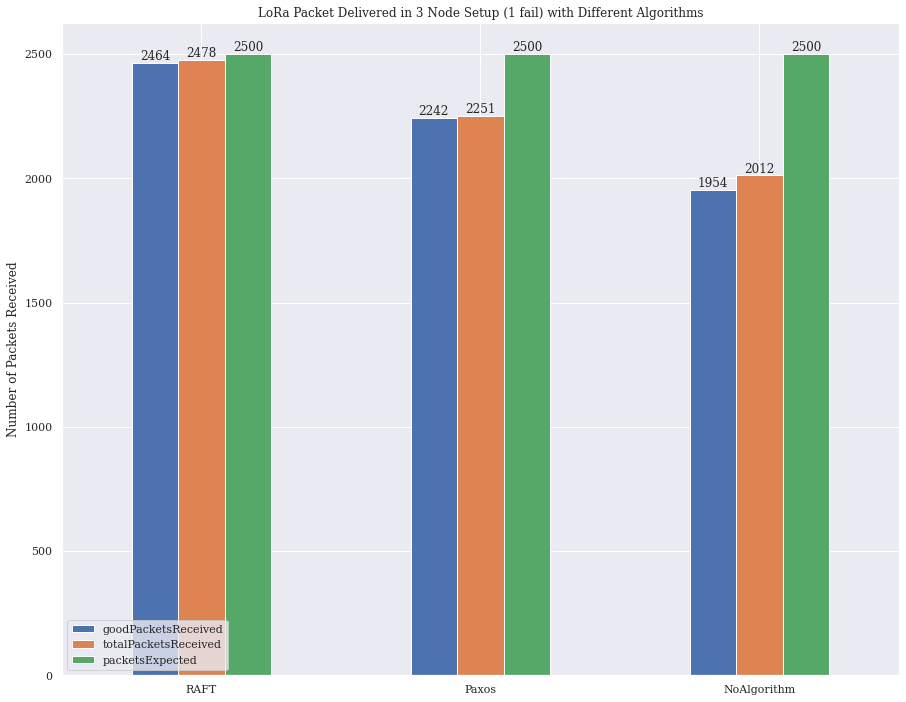

In [79]:
ax = all_3_nodes.plot.bar(x='algorithm')
plt.title('LoRa Packet Delivered in 3 Node Setup (1 fail) with Different Algorithms')
ax.set(xlabel='', ylabel='Number of Packets Received')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
for bars in ax.containers:
    ax.bar_label(bars)
plt.legend(loc='lower left')
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\3_nodes_1.png', bbox_inches='tight')

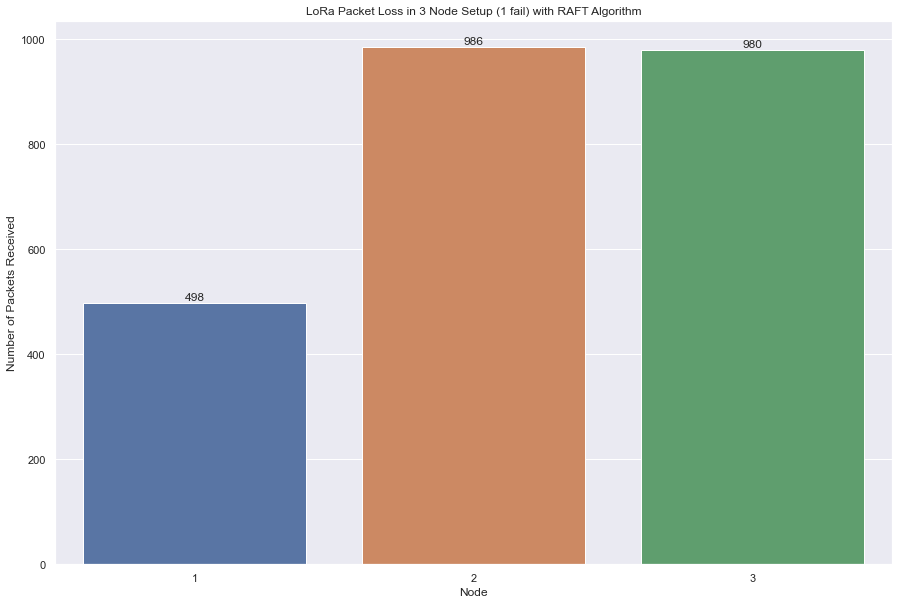

In [80]:
#LoRa Packet Loss in 3 Node Setup (1 fail) with RAFT Algorithm
plt.rcParams['figure.figsize']=(15,10)
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='nodeName', data=final_clean_raft_3)
plt.title('LoRa Packet Loss in 3 Node Setup (1 fail) with RAFT Algorithm')
ax.set(xlabel='Node', ylabel='Number of Packets Received')
#for container in ax.containers:
    #ax.bar_label(container)
ax.bar_label(ax.containers[0])
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\3_nodes_1_RAFT.png', bbox_inches='tight')

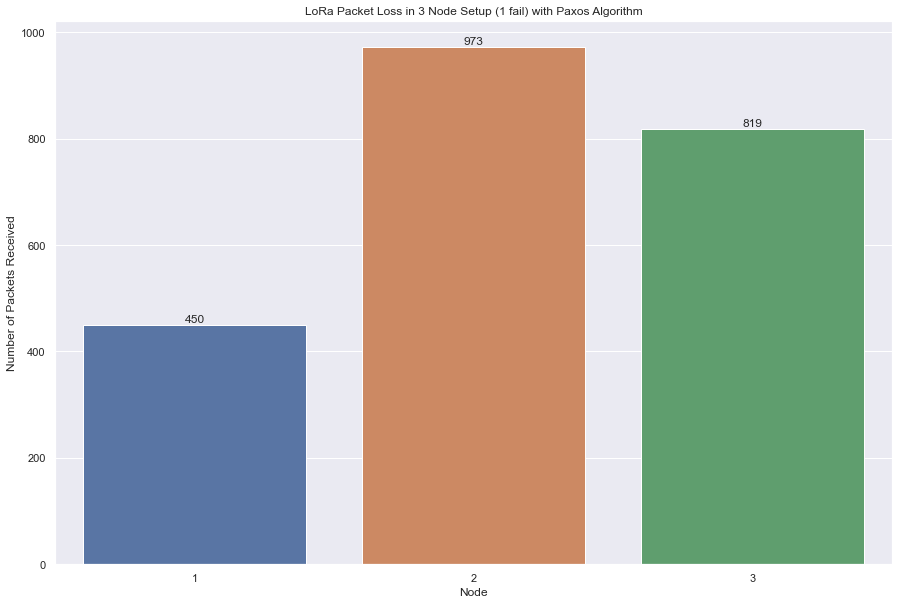

In [81]:
#LoRa Packet Loss in 3 Node Setup (1 fail) with Paxos Algorithm
plt.rcParams['figure.figsize']=(15,10)
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='nodeName', data=final_clean_paxos_3)
plt.title('LoRa Packet Loss in 3 Node Setup (1 fail) with Paxos Algorithm')
ax.set(xlabel='Node', ylabel='Number of Packets Received')
#for container in ax.containers:
    #ax.bar_label(container)
ax.bar_label(ax.containers[0])
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\3_nodes_1_Paxos.png', bbox_inches='tight')

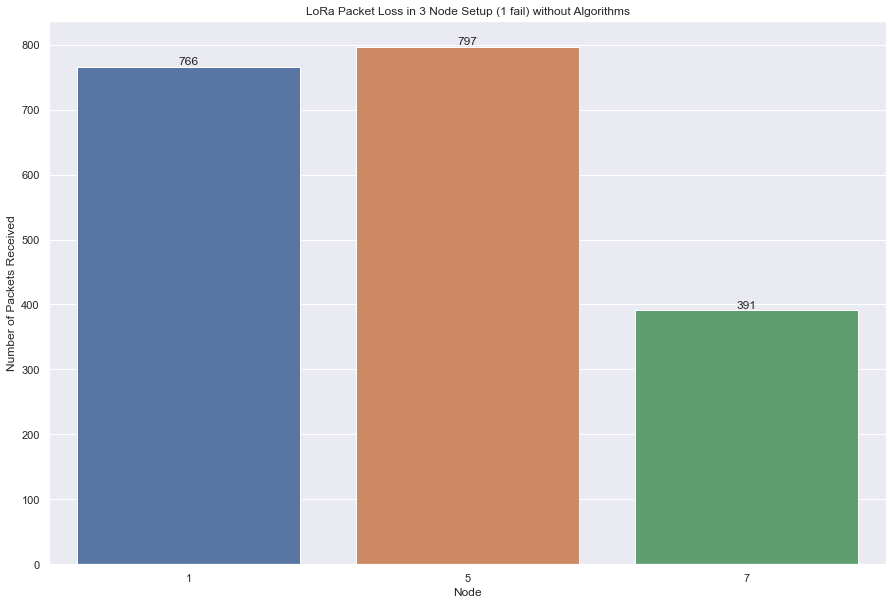

In [82]:
#LoRa Packet Loss in 3 Node Setup (1 fail) without Algorithms
plt.rcParams['figure.figsize']=(15,10)
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='nodeName', data=final_clean_noalg_3)
plt.title('LoRa Packet Loss in 3 Node Setup (1 fail) without Algorithms')
ax.set(xlabel='Node', ylabel='Number of Packets Received')
#for container in ax.containers:
    #ax.bar_label(container)
ax.bar_label(ax.containers[0])
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\3_nodes_1_noAlg_outdoor.png', bbox_inches='tight')

In [61]:
#no alg indoor

In [62]:
indoor_noalg_data_3_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\experiments\\packet_loss\\control\\6_control_3-nodes_1-failure\\data.csv", error_bad_lines=False, sep=",")

In [63]:
indoor_noalg_data_3_nodes[indoor_noalg_data_3_nodes.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,5,1,27.0,53.0,38.0,25
3,5,2,27.0,53.0,38.0,25
4,5,3,27.0,53.0,38.0,25
...,...,...,...,...,...,...
1997,5,1000,27.0,34.0,37.0,25
1998,2,997,21.0,63.0,40.0,25
1999,2,998,21.0,66.0,40.0,25
2000,2,999,21.0,72.0,40.0,25


In [64]:
indoor_noalg_data_3_nodes_clean = indoor_noalg_data_3_nodes.dropna()

In [65]:
indoor_noalg_data_3_nodes_clean.shape

(2000, 6)

In [66]:
indoor_noalg_data_3_nodes_clean.to_csv('C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\indoor_noalg_data_3_nodes_1_clean.csv', index = False, header=True)

In [67]:
#manual cleaning of the csv req

In [68]:
clean_indoor_noalg_data_3_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\indoor_noalg_data_3_nodes_1_clean.csv", sep=",")

In [69]:
clean_indoor_noalg_data_3_nodes.shape

(2000, 6)

In [70]:
clean_indoor_noalg_data_3 = clean_indoor_noalg_data_3_nodes.dropna()

In [71]:
clean_indoor_noalg_data_3.shape

(1996, 6)

In [72]:
final_indoor_clean_noalg_3 = clean_indoor_noalg_data_3.astype({"nodeName":np.int64,"packetNumber":np.int64,"temperature":np.int64,"brightness":np.int64,"humidity":np.int64,"onBoardTemp":np.int64})

In [83]:
df1 = {'algorithm': ['RAFT', 'Paxos', 'NoAlgorithmOutdoor', 'NoAlgorithmIndoor'], 
               'goodPacketsReceived': [len(final_clean_raft_3), len(final_clean_paxos_3), len(final_clean_noalg_3),len(final_indoor_clean_noalg_3)], 
               'totalPacketsReceived': [len(raft_data_3_nodes), len(paxos_data_3_nodes), len(noalg_data_3_nodes),len(indoor_noalg_data_3_nodes)], 
               'packetsExpected': [2500, 2500, 2500,2500]}

all_3_nodes_indoor = pd.DataFrame(df1)

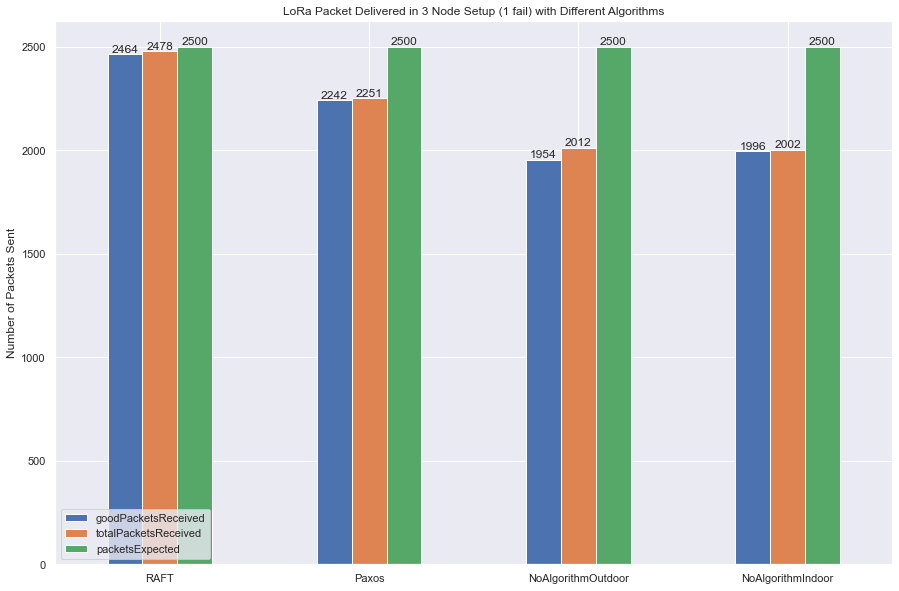

In [85]:
ax = all_3_nodes_indoor.plot.bar(x='algorithm')
plt.title('LoRa Packet Delivered in 3 Node Setup (1 fail) with Different Algorithms')
ax.set(xlabel='', ylabel='Number of Packets Sent')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
for bars in ax.containers:
    ax.bar_label(bars)
plt.legend(loc='lower left')
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\3_nodes_1_indoor.png', bbox_inches='tight')

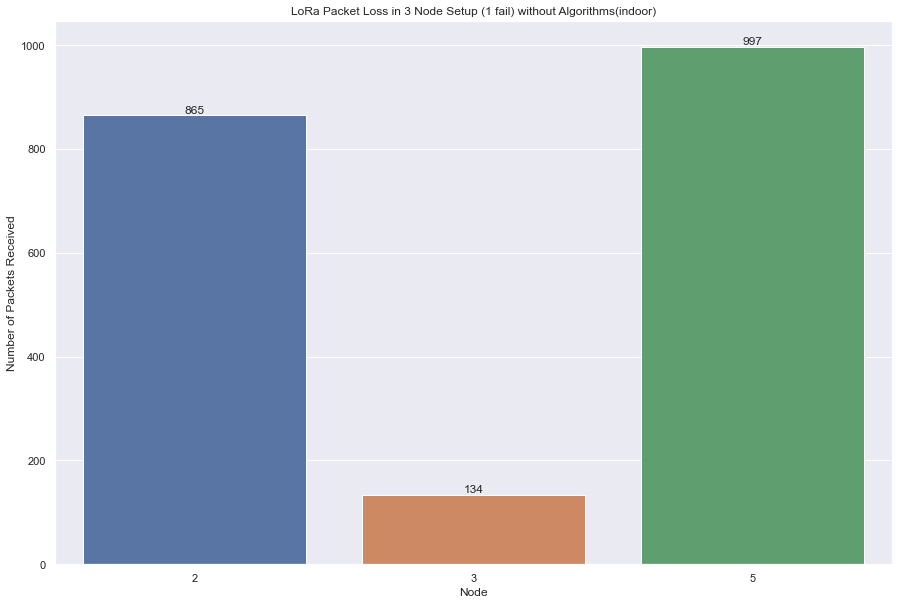

In [86]:
#LoRa Packet Loss in 3 Node Setup (1 fail) without Algorithms INDOOR
plt.rcParams['figure.figsize']=(15,10)
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='nodeName', data=final_indoor_clean_noalg_3)
plt.title('LoRa Packet Loss in 3 Node Setup (1 fail) without Algorithms(indoor)')
ax.set(xlabel='Node', ylabel='Number of Packets Received')
#for container in ax.containers:
    #ax.bar_label(container)
ax.bar_label(ax.containers[0])
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\3_nodes_1_noAlg_indoor.png', bbox_inches='tight')